In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## get the data points

In [ ]:
def getTrainData(xRange, N):
    X = np.reshape(np.linspace(xRange[0], xRange[1], N), (N, 1))
    y = np.cos(10 * X ** 2) + 0.1 * np.sin(100 * X)

    X = np.array(X).reshape(-1)
    y = np.array(y).reshape(-1)
    return X, y

## using gaussian kernel basis function to map data to much more features

In [12]:
def gaussian_construct_PHI(order,X,mean = [],sigma = 0.1):
    """
    gaussian basis function mapping
    equally spaced between -0.5 and 1 (inclusive)
    :param order:
    :param X:
    :return:
    """
    PHI = []

    mean = np.reshape(np.linspace(-0.5, 1, 10), (10, 1))
    #bias
    PHI.append([1]*len(X))
    for j in range(1,order+1):
        temp1 = np.exp(-1*(((X - mean[j-1])**2)/(2*sigma*sigma)))
        PHI.append(temp1)
    return np.array(PHI).T

### get samples from gaussian distribution

In [13]:
def get_sample(Phi,Y,S0 = 1,sigma2 = 0.1,size = 5):
    Phi_all = Phi.T.dot(Phi)
    dimension = Phi_all.shape[0]
    I = np.eye(dimension)

    S = np.linalg.inv(S0*I + (1/sigma2)*Phi_all)
    M = S.dot((1/sigma2)*Phi.T.dot(Y))
    M = np.reshape(M,-1)
    weights = np.random.multivariate_normal(M, S, size)

    return weights,M,S

### get the variance of bayesian regression inference

In [22]:
def get_variance(Phi,SN,sigma2,type = 0):
    m = Phi.shape[0]
    n = Phi.shape[1]
    res = []
    for i in range(m):
        phi = np.reshape(Phi[i],[n,1])
        if type == 0:
            r = np.reshape(phi.T.dot(SN).dot(phi),-1)
        else:
            r = np.reshape(phi.T.dot(SN).dot(phi) + sigma2, -1)
        res.append(r)

    res = np.array(res)
    res = res.reshape(-1)
    res = np.sqrt(res)
    return res

### plot the bayesian regression and with +-(two standard deviation)

In [29]:
def plot_bayesian(train_X,Y,weights,MN,SN,beta):

    label = []
    text = []

    test_X, train_y = getTrainData([-1, 1.5], 200)
    Phi = gaussian_construct_PHI(10,test_X)

    predicted_Y = []
    for w in weights:
        pre_y = Phi.dot(w)
        predicted_Y.append(pre_y)

    plt.scatter(train_X, Y, color='red',marker='x')
    for i in range(len(weights)):
        plt.plot(test_X,predicted_Y[i])


    #preditive mean
    predicted_mean = Phi.dot(MN)
    l, = plt.plot(test_X,predicted_mean,color='y',linestyle='-.',linewidth=3)
    label.append(l)
    text.append("predictive mean")

    #2 standard deviations without noise
    standard_var = get_variance(Phi,SN,beta,type = 0)
    predicted_mean_up = predicted_mean + 2*standard_var
    predicted_mean_down = predicted_mean - 2*standard_var

    plt.fill_between(test_X, predicted_mean_up, predicted_mean_down, facecolor="dodgerblue",alpha=0.5)

    # 2 standard deviations with noise
    standard_var_with_noise = get_variance(Phi, SN, beta, type=1)
    predicted_noise_up = predicted_mean + 2*standard_var_with_noise
    predicted_noise_down = predicted_mean - 2*standard_var_with_noise

    plt.plot(test_X, predicted_noise_up, color='b', linestyle='dotted', linewidth=2)
    plt.plot(test_X, predicted_noise_down, color='b', linestyle='dotted', linewidth=2)

    plt.legend(label, text, loc='upper right')
    plt.xlim(-1,1.5)
    plt.xlabel('x') 
    plt.ylabel('y')
    plt.show()

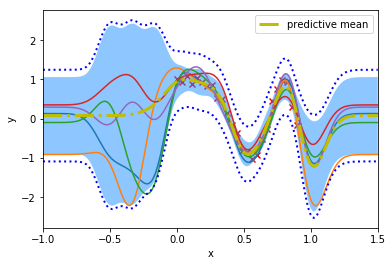

In [30]:
train_X, train_y = getTrainData([0, 0.9], 25)
train_y = np.reshape(train_y, [25, 1])
Phi = gaussian_construct_PHI(10,train_X)

weights,MN,SN = get_sample(Phi,train_y)
plot_bayesian(train_X,train_y,weights,MN,SN,beta = 0.1)